In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import os
import csv
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import joblib
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_curve ,roc_auc_score,ConfusionMatrixDisplay
# from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

# New Section

In [26]:
# #Connecting to Drive
# from google.colab import drive
# drive.mount('/content/drive')


In [27]:
# import tensorflow as tf
#
# # Check if GPU is available
# if not tf.test.gpu_device_name():
#     print('GPU device not found')
# else:
#     print('GPU available:', tf.test.gpu_device_name())

In [ ]:
Normal = './Mixed_Dataset_Images/Normal'
Abnormal = './Mixed_Dataset_Images/Abnormal'

In [29]:
# import cupy as cp



i=0
for filename in os.listdir(Abnormal):
    img = cv2.imread(os.path.join(Abnormal, filename))
    if img is not None:

        #grayscaling the image dataset
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img2 = cv2.GaussianBlur(gray, (5, 5), 0)  # gaussian Image

        # creating a Histograms Equalization for folder1(Fall)
        equ = cv2.equalizeHist(img2)

        #Applyed
        canny = cv2.Canny(equ, 150, 150)

        #Applying Sift  Discriptor Abnormal folder
        sift = cv2.SIFT_create()
        kp, des = sift.detectAndCompute(canny, None)

        #convert the descriptor array into a dataframe format
        out = pd.DataFrame(des)
        print("descriptor shape ", i, " : ", out.shape)
        i = i + 1

        csv_data = out.to_csv('folder1.csv', mode='w', header=False, index=False)


descriptor shape  0  :  (396, 128)
descriptor shape  1  :  (428, 128)
descriptor shape  2  :  (285, 128)
descriptor shape  3  :  (204, 128)
descriptor shape  4  :  (204, 128)
descriptor shape  5  :  (204, 128)
descriptor shape  6  :  (230, 128)
descriptor shape  7  :  (204, 128)
descriptor shape  8  :  (425, 128)
descriptor shape  9  :  (416, 128)
descriptor shape  10  :  (416, 128)
descriptor shape  11  :  (400, 128)
descriptor shape  12  :  (420, 128)
descriptor shape  13  :  (412, 128)
descriptor shape  14  :  (316, 128)
descriptor shape  15  :  (373, 128)
descriptor shape  16  :  (179, 128)
descriptor shape  17  :  (179, 128)
descriptor shape  18  :  (189, 128)
descriptor shape  19  :  (185, 128)
descriptor shape  20  :  (151, 128)
descriptor shape  21  :  (205, 128)
descriptor shape  22  :  (146, 128)
descriptor shape  23  :  (181, 128)
descriptor shape  24  :  (213, 128)
descriptor shape  25  :  (44, 128)
descriptor shape  26  :  (434, 128)
descriptor shape  27  :  (402, 128)
des

In [30]:


i=0
for filename in os.listdir(Normal):
    img = cv2.imread(os.path.join(Normal, filename))
    if img is not None:

        #grayscaling the image dataset
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img2 = cv2.GaussianBlur(gray, (5, 5), 0)  # gaussian Image

        # creating a Histograms Equalization for folder1(Fall)
        equ = cv2.equalizeHist(img2)

        # cv2.imshow('Chain Snatching Detection', equ)

        #Applyed
        canny = cv2.Canny(equ, 150, 150)

        #Applying Sift  Discriptor Abnormal folder
        sift = cv2.SIFT_create()
        kp, des = sift.detectAndCompute(canny, None)

        #convert the descriptor array into a dataframe format
        out = pd.DataFrame(des)
        print("descriptor shape ", i, " : ", out.shape)
        i = i + 1

        csv_data = out.to_csv('normal.csv', mode='w', header=False, index=False)

descriptor shape  0  :  (191, 128)
descriptor shape  1  :  (404, 128)
descriptor shape  2  :  (376, 128)
descriptor shape  3  :  (250, 128)
descriptor shape  4  :  (274, 128)
descriptor shape  5  :  (217, 128)
descriptor shape  6  :  (365, 128)
descriptor shape  7  :  (217, 128)
descriptor shape  8  :  (263, 128)
descriptor shape  9  :  (348, 128)
descriptor shape  10  :  (211, 128)
descriptor shape  11  :  (318, 128)
descriptor shape  12  :  (140, 128)
descriptor shape  13  :  (327, 128)
descriptor shape  14  :  (254, 128)
descriptor shape  15  :  (254, 128)
descriptor shape  16  :  (258, 128)
descriptor shape  17  :  (296, 128)
descriptor shape  18  :  (257, 128)
descriptor shape  19  :  (204, 128)
descriptor shape  20  :  (185, 128)
descriptor shape  21  :  (179, 128)
descriptor shape  22  :  (204, 128)
descriptor shape  23  :  (202, 128)
descriptor shape  24  :  (219, 128)
descriptor shape  25  :  (175, 128)
descriptor shape  26  :  (204, 128)
descriptor shape  27  :  (464, 128)
de

In [31]:
# cp.cuda.Device(0).use()
# Load the CSV files into pandas DataFrames
chain_df = pd.read_csv('folder1.csv',header=None,dtype='uint8')
chain_df=chain_df.astype(np.uint8)


normal_df = pd.read_csv('normal.csv',header=None,dtype='uint8')
normal_df=normal_df.astype(np.uint8)


In [32]:
# # Add a new column for the labels
# chain_df['label'] = 1
# normal_df['label'] = 0

In [33]:
# Appending
data=normal_df.append(chain_df)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6576\1000798113.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=normal_df.append(chain_df)


In [34]:
#Save
csv_data=data.to_csv('finalData.csv', mode='w', header=False,index=False)

In [35]:
# Combine the two DataFrames into one
# df = pd.concat([chain_df, normal_df], ignore_index=True)

In [2]:
#read the data from the previously saved csv file
data = pd.read_csv('finalData.csv',header=None,dtype='uint8')
data=data.astype(np.uint8)
data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,115,0,0,0,0,0,0,28,112,0,...,0,13,0,0,6,81,8,0,0,0
1,56,60,0,0,25,69,5,4,59,12,...,0,2,0,0,0,4,13,0,0,0
2,49,53,16,66,21,4,32,58,52,84,...,0,0,11,1,0,0,8,1,0,0
3,112,71,8,9,46,25,3,5,46,37,...,0,0,1,1,0,0,0,0,0,0
4,9,3,2,1,11,10,4,4,2,0,...,19,10,110,10,13,16,67,4,13,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3291,49,0,0,0,0,0,0,19,93,0,...,1,27,5,1,0,25,129,1,0,1
3292,84,34,8,1,54,19,6,2,55,15,...,2,0,48,51,2,7,107,25,0,0
3293,19,24,13,34,20,9,8,6,1,3,...,2,4,1,0,0,9,13,0,3,5
3294,2,10,68,14,8,16,75,9,1,2,...,18,28,70,11,38,111,22,11,20,27


D:\module 6\CV\CP\New\ONImages\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\module 6\CV\CP\New\ONImages\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\module 6\CV\CP\New\ONImages\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\module 6\CV\CP\New\ONImages\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\module 6\

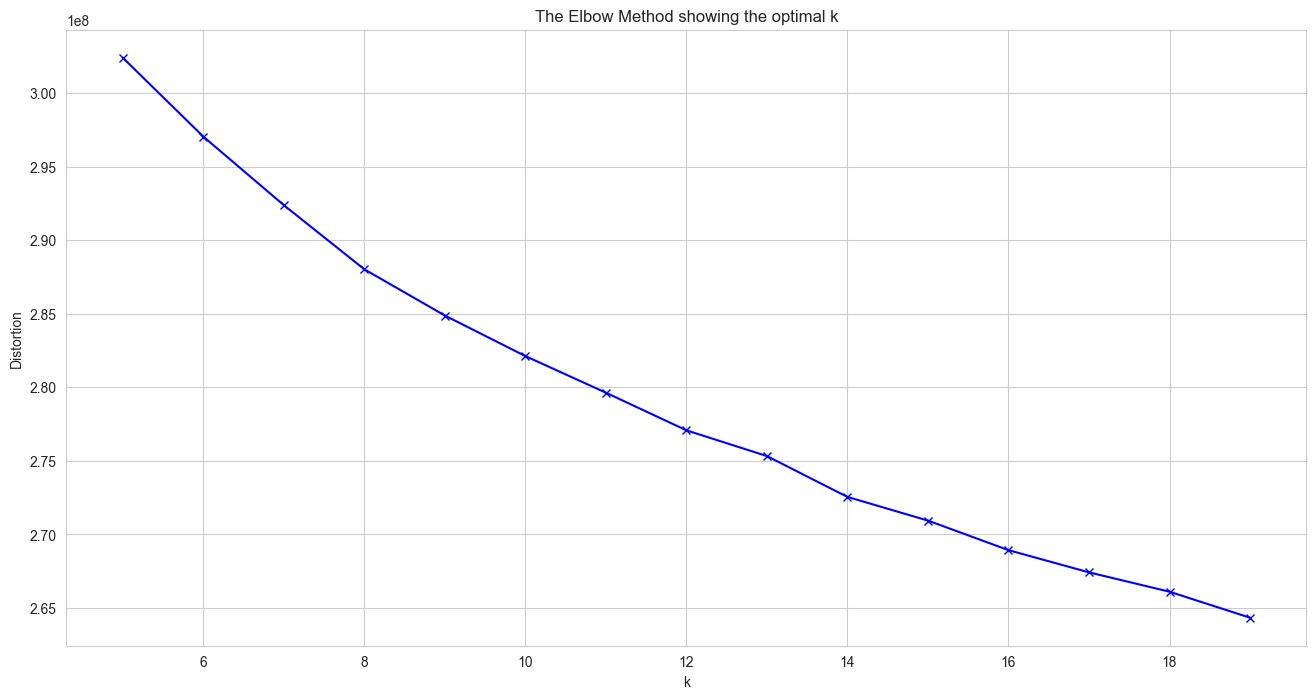

In [7]:


distortions = []
K = range(5,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [33]:
##    K meanse Clustring
#Applying Kmeans
kmeans = KMeans(n_clusters=12)
kmeans.fit(data)

D:\module 6\CV\CP\New\ONImages\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=12)

In [34]:
#save the model to disk
import pickle
filename = 'Kmeans_CL_2_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [28]:
#calculate histogram of trained kmeans
hist = np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12])

print("Histogram of trained kmeans")
print(hist, "\n")

Histogram of trained kmeans
(array([356, 225, 121, 313, 301, 221, 250, 304, 404, 278, 190, 333],
      dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])) 



In [ ]:
#performing kmeans prediction on the Abnormal with the pretrained kmeans model

#initialising i=0; as it is the first class
i=0
data=[]
#k=0

for filename in os.listdir(Abnormal):
    #path
    path=os.path.join(Abnormal,filename)
    a=cv2.imread(path)

    #gray image
    gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

    # creating a Histograms Equalization for folder1(Fall)
    equ = cv2.equalizeHist(gray)

    #Applyeda
    canny = cv2.Canny(equ, 150, 150)
    #Applying Sift  Discriptor Abnormal folder
    sift = cv2.SIFT_create()
    kp, descriptors = sift.detectAndCompute(canny, None)

    out=pd.DataFrame(descriptors)

    array_double = np.array(out, dtype=np.double)
    try:
        a=kmeans.predict(array_double)
    except:
        print(filename)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12])

    #append the dataframe into the array
    data.append(hist[0])


#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class
Output["Class"] = i
csv_data=Output.to_csv('finalAbnormal.csv', mode='w',header=False,index=False)

In [ ]:
#performing kmeans prediction on the Normal with the pretrained kmeans model

#initialising i=1; as it is the first class
i=1
data=[]
#k=0

for filename in os.listdir(Normal):
    #path
    path=os.path.join(Normal,filename)
    a=cv2.imread(path)

    #gray image
    gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

    # creating a Histograms Equalization for folder1(Fall)
    equ = cv2.equalizeHist(gray)

    #Applyeda
    canny = cv2.Canny(equ, 150, 150)
    #Applying Sift  Discriptor Abnormal folder
    sift = cv2.SIFT_create()
    kp, descriptors = sift.detectAndCompute(canny, None)

    out=pd.DataFrame(descriptors)

    array_double = np.array(out, dtype=np.double)
    try:
        a=kmeans.predict(array_double)
    except:
        print(filename)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12])

    #append the dataframe into the array
    data.append(hist[0])


#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class
Output["Class"] = i
csv_data=Output.to_csv('finalNormal.csv', mode='w',header=False,index=False)

In [90]:

#Displaying the kmeans predicted data of folder1
print("Abnormal")
dat1= pd.read_csv('finalAbnormal.csv',header=None)
print(dat1)

Abnormal
      0   1   2   3    4    5    6    7    8    9    10    11  12
0    106  35  37  45   66   77  127  144  169  226  268   951   0
1    236  54  82  67   93  145  172  187  246  313  422  1407   0
2    196  43  61  85  131  147  168  255  352  463  677  3187   0
3    285  57  85  95  121  174  257  313  457  635  890  3032   0
4    285  57  85  95  121  174  257  313  457  635  890  3032   0
..   ...  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   ...  ..
892   23   4  10   8   13    9   19   23   26   21   35    97   0
893   22   5  10   6   10   17   14   28   29   47   41   115   0
894   24   4   6   6    9   14   10   19   24   24   29    85   0
895   18   3   8   3   10    9    8   25   16   33   37    90   0
896   12   5   7   8   14    8    9   17   19   33   40    96   0

[897 rows x 13 columns]


In [91]:
#Displaying the kmeans predicted data of folder2
print("Normal")
dat2= pd.read_csv('finalNormal.csv',header=None)
print(dat2)

Normal
        0    1    2    3    4    5    6    7    8     9     10    11  12
0       52    6    7   10    9   26   29   57   52    82    63   245   1
1      315  101  102   96  121  146  203  227  275   294   344   999   1
2      664  137  146  157  202  217  258  259  285   399   437  1106   1
3      743  165  188  216  318  370  454  617  773   965  1178  3412   1
4     1341  265  307  370  485  517  574  771  961  1062  1294  3942   1
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...  ..
1477   106   23   27   30   42   43   52   67   95   120   169   398   1
1478   112   17   37   42   47   67   80  143  156   190   210   566   1
1479   146   41   55   48   74  102  119  139  148   185   218   567   1
1480     7    3    6    3   14   14   14   13   27    32    43   136   1
1481    12    3    5   11    6   25   13   23   26    29    30   143   1

[1482 rows x 13 columns]


In [92]:
#appending All kmeans predicted data into 1 dataframe
A = dat1.append(dat2)
A

C:\Users\DELL\AppData\Local\Temp\ipykernel_6576\3583313304.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  A = dat1.append(dat2)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,106,35,37,45,66,77,127,144,169,226,268,951,0
1,236,54,82,67,93,145,172,187,246,313,422,1407,0
2,196,43,61,85,131,147,168,255,352,463,677,3187,0
3,285,57,85,95,121,174,257,313,457,635,890,3032,0
4,285,57,85,95,121,174,257,313,457,635,890,3032,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,106,23,27,30,42,43,52,67,95,120,169,398,1
1478,112,17,37,42,47,67,80,143,156,190,210,566,1
1479,146,41,55,48,74,102,119,139,148,185,218,567,1
1480,7,3,6,3,14,14,14,13,27,32,43,136,1


In [93]:
#save the predicted data into csv file
csv_data=A.to_csv('FinalFeatures2.csv', mode='w',header=False,index=False)

# Reading the Final Feature Vector Before Classifiers

In [45]:


df= pd.read_csv('FinalFeatures2.csv',header=None)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,106,35,37,45,66,77,127,144,169,226,268,951,0
1,236,54,82,67,93,145,172,187,246,313,422,1407,0
2,196,43,61,85,131,147,168,255,352,463,677,3187,0
3,285,57,85,95,121,174,257,313,457,635,890,3032,0
4,285,57,85,95,121,174,257,313,457,635,890,3032,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,106,23,27,30,42,43,52,67,95,120,169,398,1
2375,112,17,37,42,47,67,80,143,156,190,210,566,1
2376,146,41,55,48,74,102,119,139,148,185,218,567,1
2377,7,3,6,3,14,14,14,13,27,32,43,136,1


In [46]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,106,35,37,45,66,77,127,144,169,226,268,951,0
1,236,54,82,67,93,145,172,187,246,313,422,1407,0
2,196,43,61,85,131,147,168,255,352,463,677,3187,0
3,285,57,85,95,121,174,257,313,457,635,890,3032,0
4,285,57,85,95,121,174,257,313,457,635,890,3032,0


In [47]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
2374,106,23,27,30,42,43,52,67,95,120,169,398,1
2375,112,17,37,42,47,67,80,143,156,190,210,566,1
2376,146,41,55,48,74,102,119,139,148,185,218,567,1
2377,7,3,6,3,14,14,14,13,27,32,43,136,1
2378,12,3,5,11,6,25,13,23,26,29,30,143,1


In [48]:
#Check for NaN under a single DataFrame column
df.isnull().values.any()

False

In [49]:
X = df.drop(columns= 12, axis=1)

In [50]:
Y = df[12]

In [51]:
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,106,35,37,45,66,77,127,144,169,226,268,951
1,236,54,82,67,93,145,172,187,246,313,422,1407
2,196,43,61,85,131,147,168,255,352,463,677,3187
3,285,57,85,95,121,174,257,313,457,635,890,3032
4,285,57,85,95,121,174,257,313,457,635,890,3032
...,...,...,...,...,...,...,...,...,...,...,...,...
2374,106,23,27,30,42,43,52,67,95,120,169,398
2375,112,17,37,42,47,67,80,143,156,190,210,566
2376,146,41,55,48,74,102,119,139,148,185,218,567
2377,7,3,6,3,14,14,14,13,27,32,43,136


In [52]:
Y


0       0
1       0
2       0
3       0
4       0
       ..
2374    1
2375    1
2376    1
2377    1
2378    1
Name: 12, Length: 2379, dtype: int64

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,
                                                 test_size=0.30, random_state = 0)
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (1665, 12)
Number transactions y_train dataset:  (1665,)
Number transactions X_test dataset:  (714, 12)
Number transactions y_test dataset:  (714,)


### RandomForest

--------------------------------------------------------------------------------
Applying Random Forest
1.0
--------------------------------------------------------------------------------
Accuracy on Test data :  0.9019607843137255
--------------------------------------------------------------------------------
Presion : 0.9525959367945824
--------------------------------------------------------------------------------
Recall : 0.8959660297239915
--------------------------------------------------------------------------------
F1 score :  0.9234135667396062
-----------------------------------------------------------------------------------


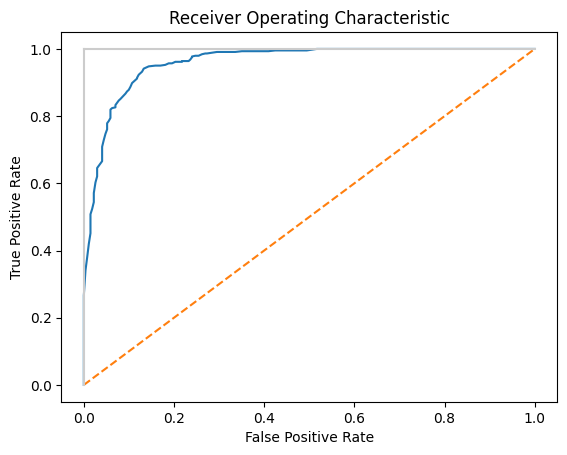

['RandomForest.pkl']

In [54]:

modelRF = RandomForestClassifier()
modelRF.fit(X_train,Y_train)

## produce a confusion matrix ##
# ConfusionMatrixDisplay(modelRF, X_test, Y_test)
# plt.show()

# accuracy on training data
X_train_prediction = modelRF.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)
print("--------------------------------------------------------------------------------")

print("Applying Random Forest")
print(train_data_accuracy)

# accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("--------------------------------------------------------------------------------")
print('Accuracy on Test data : ', test_data_accuracy)

print("--------------------------------------------------------------------------------")

print('Presion :',precision_score(X_test_prediction,Y_test))
print("--------------------------------------------------------------------------------")

print('Recall :',recall_score(X_test_prediction,Y_test))
print("--------------------------------------------------------------------------------")

print('F1 score : ', f1_score(X_test_prediction,Y_test))
print("-----------------------------------------------------------------------------------")
## produce a ROC plot ##
#obtain prediction probabilities
y_prob = modelRF.predict_proba(X_test)
#calculate false & true positive rates
fpr,tpr,_ = roc_curve(Y_test, y_prob[:,1])
#construct plot
plt.plot(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
joblib.dump(modelRF, 'RandomForest.pkl')

### Random Forest Using K_Fold

accuracy of each fold - [0.20294117647058824, 0.5147058823529411, 0.5088235294117647, 0.6588235294117647, 0.40294117647058825, 0.7264705882352941, 0.616519174041298]
--------------------------------------------------------------------
Avg accuracy : 0.5187464366277484
Avg precision: 0.943936587793012
Avg recall: 0.5187464366277484
Avg f1-score: 0.6420030814424751


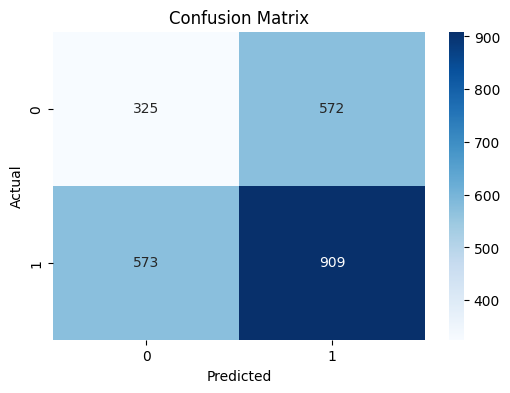

['RandomForest_Kfold.pkl']

In [38]:
# k = 7
# kf = KFold(n_splits=k, random_state=None)
# modelRFK = RandomForestClassifier()
#
# acc_score = []
# for train_index , test_index in kf.split(X):
#     X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
#     y_train , y_test = Y[train_index] , Y[test_index]
#
#
#
#     modelRFK.fit(X_train,y_train)
#
#     pred_values = modelRFK.predict(X_test)
#     acc = accuracy_score(pred_values , y_test)
#     acc_score.append(acc)
#
# avg_acc_score = sum(acc_score)/k
#
# print('accuracy of each fold - {}'.format(acc_score))
# print('Avg accuracy : {}'.format(avg_acc_score))
# joblib.dump(modelRFK, 'RandomForest_Kfold.pkl')

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Train and test the Random Forest model using k-fold cross validation
k = 7
kf = KFold(n_splits=k, random_state=None)
modelRFK = RandomForestClassifier()

conf_matrices = []
acc_score = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = Y[train_index], Y[test_index]

    modelRFK.fit(X_train, y_train)

    pred_values = modelRFK.predict(X_test)
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)

    # Calculate classification metrics

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred_values, average='weighted',zero_division=1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
       # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, pred_values)
    conf_matrices.append(conf_matrix)

avg_acc_score = sum(acc_score) / k
avg_precision_score = sum(precision_scores) / k
avg_recall_score = sum(recall_scores) / k
avg_f1_score = sum(f1_scores) / k



print('accuracy of each fold - {}'.format(acc_score))
# Print average performance metrics
print("--------------------------------------------------------------------")
print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg precision: {}'.format(avg_precision_score))
print('Avg recall: {}'.format(avg_recall_score))
print('Avg f1-score: {}'.format(avg_f1_score))

# Plot the confusion matrix
avg_conf_matrix = sum(conf_matrices)
plt.figure(figsize=(6, 4))
sns.heatmap(avg_conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Save model to disk
joblib.dump(modelRFK, 'RandomForest_Kfold.pkl')


### LogisticRegression K_Fold

accuracy of each fold - [0.07941176470588235, 0.11176470588235295, 0.45, 0.8705882352941177, 0.7058823529411765, 0.638235294117647, 0.9557522123893806]
--------------------------------------------------------------------
Avg accuracy : 0.544519223618651
Avg precision: 0.9688248847926266
Avg recall: 0.544519223618651
Avg f1-score: 0.6033881070052478


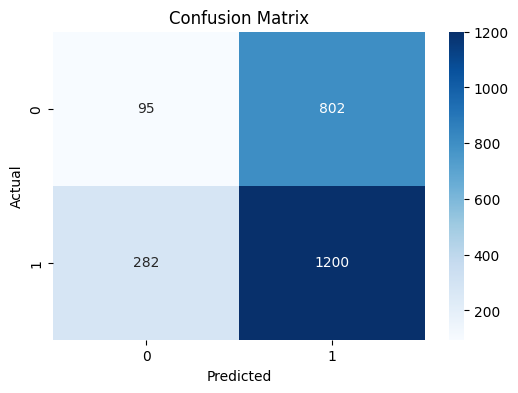

['LogisticRegression.pkl']

In [42]:
from sklearn.linear_model import LogisticRegression
k = 7
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')

conf_matrices = []
acc_score = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]



    model.fit(X_train,y_train)

    pred_values = model.predict(X_test)
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)

      # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, pred_values)
    conf_matrices.append(conf_matrix)

     # Calculate classification metrics
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred_values, average='weighted', zero_division=1)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

avg_acc_score = sum(acc_score)/k
avg_precision_score = sum(precision_scores) / k
avg_recall_score = sum(recall_scores) / k
avg_f1_score = sum(f1_scores) / k

print('accuracy of each fold - {}'.format(acc_score))
# Print average performance metrics
print("--------------------------------------------------------------------")
print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg precision: {}'.format(avg_precision_score))
print('Avg recall: {}'.format(avg_recall_score))
print('Avg f1-score: {}'.format(avg_f1_score))

# Plot the confusion matrix
avg_conf_matrix = sum(conf_matrices)
plt.figure(figsize=(6, 4))
sns.heatmap(avg_conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save model to disk
joblib.dump(modelRFK, 'LogisticRegression.pkl')

# SVM with K_Fold

In [ ]:
from sklearn.model_selection import cross_val_score
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=None)
model_svm = svm.SVC(kernel='linear')


acc_score = []
y_true = []
y_pred = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]

    model_svm.fit(X_train, y_train)

    pred_values = model_svm.predict(X_test)
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)

    y_true.extend(y_test)
    y_pred.extend(pred_values)

avg_acc_score = sum(acc_score) / k

print('Accuracy of each fold - {}'.format(acc_score))
print('Average accuracy: {}'.format(avg_acc_score))

print(classification_report(y_true, y_pred))

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM')
plt.legend(loc="lower right")
plt.show()


joblib.dump(model_svm, "svm.pkl")

# Decision Tree

accuracy of each fold - [0.5436241610738255, 0.40604026845637586, 0.5268456375838926, 0.569023569023569, 0.30303030303030304, 0.39057239057239057, 0.5656565656565656, 0.6734006734006734]
Avg accuracy : 0.49727419609969953
              precision    recall  f1-score   support

           0       0.37      0.49      0.43       897
           1       0.62      0.50      0.55      1482

    accuracy                           0.50      2379
   macro avg       0.50      0.50      0.49      2379
weighted avg       0.53      0.50      0.50      2379

Confusion Matrix:
 [[443 454]
 [742 740]]


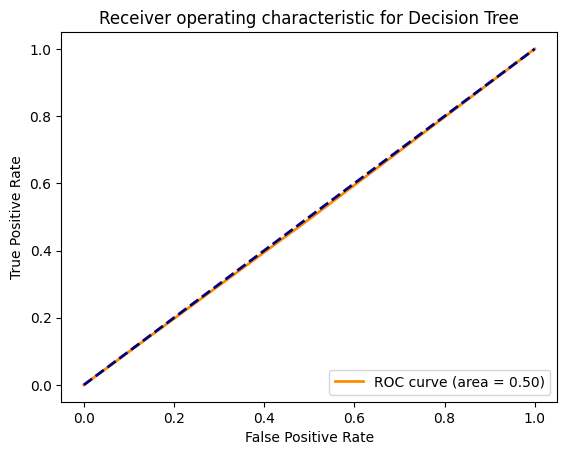

['DT.pkl']

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

k = 8
kf = KFold(n_splits=k, random_state=None)
modelDT = DecisionTreeClassifier()
acc_score = []
y_true = []
y_pred = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = Y[train_index], Y[test_index]

    modelDT.fit(X_train, y_train)

    pred_values = modelDT.predict(X_test)

    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)

    y_true.extend(y_test)
    y_pred.extend(pred_values)

avg_acc_score = sum(acc_score) / k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


print(classification_report(y_true, y_pred))
# print(confusion_matrix(y_true, y_pred))

# Get confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:\n', cm)

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()
joblib.dump(modelDT, "DT.pkl")

XG Boost

Accuracy of each fold - [0.884453781512605, 0.8991596638655462, 0.8718487394957983, 0.9117647058823529, 0.8778947368421053]
Average accuracy: 0.8890243255196815
Confusion Matrix:
 [[ 734  163]
 [ 101 1381]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       897
           1       0.89      0.93      0.91      1482

    accuracy                           0.89      2379
   macro avg       0.89      0.88      0.88      2379
weighted avg       0.89      0.89      0.89      2379



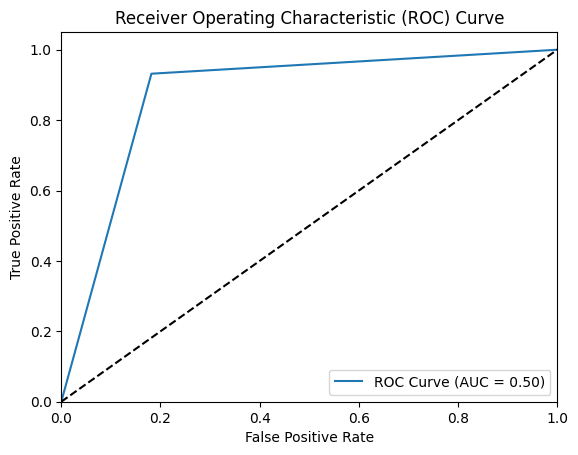

ROC AUC Score: 0.8750660095053688


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import KFold
import xgboost as xgb

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=None)

model_xgb = xgb.XGBClassifier()

acc_score = []
y_pred_list = []
y_test_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = Y[train_index], Y[test_index]

    model_xgb.fit(X_train, y_train)

    y_pred = model_xgb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_score.append(acc)

    y_pred_list.extend(y_pred)
    y_test_list.extend(y_test)

avg_acc_score = sum(acc_score) / k

print('Accuracy of each fold - {}'.format(acc_score))
print('Average accuracy: {}'.format(avg_acc_score))

# Get confusion matrix
cm = confusion_matrix(y_test_list, y_pred_list)
print('Confusion Matrix:\n', cm)

# Get classification report
cr = classification_report(y_test_list, y_pred_list)
print('Classification Report:\n', cr)


# Get the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test_list, y_pred_list)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Get ROC AUC score
roc_auc = roc_auc_score(y_test_list, y_pred_list)
print('ROC AUC Score:', roc_auc)

# Save the trained model
model_xgb.save_model("xgb_model.pkl")





 ### Inference on Test Images

descriptor shape:  (502, 128)
[1]
descriptor shape:  (1425, 128)
[1]
descriptor shape:  (624, 128)
[1]
descriptor shape:  (477, 128)
[1]
descriptor shape:  (1399, 128)
[1]
descriptor shape:  (2554, 128)
[1]


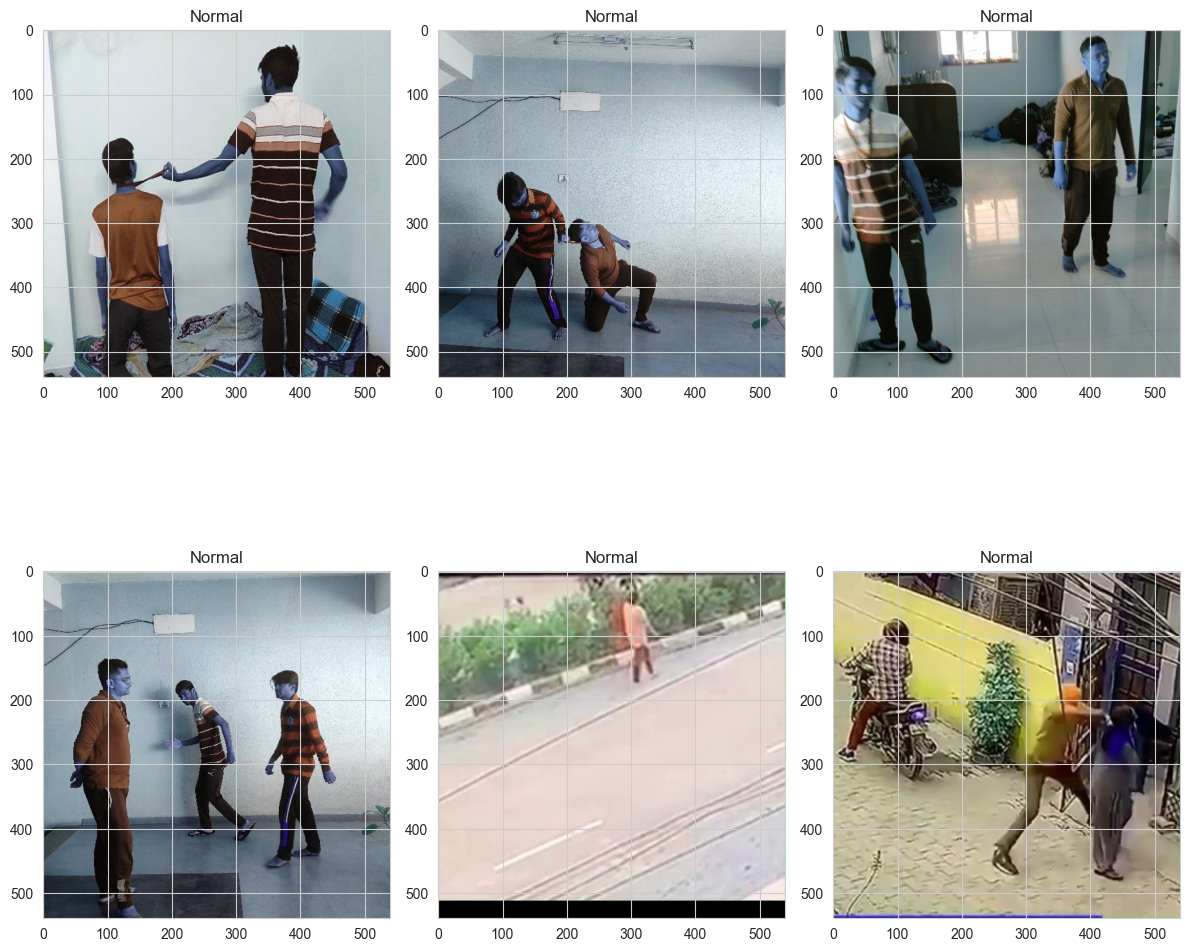

In [17]:

import joblib
model = joblib.load("RandomForest.pkl")
kmeans = joblib.load('Kmeans_CL_2_Model.sav')
test_folder = r'D:\module 6\CV\CP\New\ONImages\samples\Test_Images_2'
# Get a list of all image file names in the folder
img_files = os.listdir(test_folder)

# Define the number of rows and columns for the plot grid
num_rows = 2
num_cols = 3

# Create a new figure and set the size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))




for i, img_file in enumerate(img_files):
    data=[]
    # Load the image
    img_path = os.path.join(test_folder, img_file)
    Image = cv2.imread(img_path)

    #gray image
    gray = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (540, 540))


    # creating a Histograms Equalization for folder1(Fall)
    equ = cv2.equalizeHist(gray)

    #Applyed
    canny = cv2.Canny(equ, 150, 150)
    #Applying Sift  Discriptor Abnormal folder
    sift = cv2.SIFT_create()
    kp, descriptors = sift.detectAndCompute(canny, None)

    out=pd.DataFrame(descriptors)
    print('descriptor shape: ', out.shape)

    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    # print(filename)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12])
    # out = out.astype(np.uint8)
    # hist=np.histogram(Image,bins=[0,1,2,3,4,5])
    #append the dataframe into the array
    data.append(hist[0])

    #convert Array to Dataframe and append to the list
    Output = pd.DataFrame(data)
    pred = model.predict(Output)
     # Add the image to the plot grid and label it with the prediction
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(Image)
    print(pred)
    if pred == 0:
        axes[row, col].set_title('ChainSnatching')
    else:
        axes[row, col].set_title('Normal')

# Show the plot grid
plt.tight_layout()
plt.show()
